## General requirements for the assignment
- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Submit through GitHub
- Tag the commit as *Final submission of Assignment 1*
- Post (interesting) errors in the course Github's issue page
  
## Assignment Intro
In this assignment, you will be working with data imports. Data is provided to you both to be downloaded locally and accessed remotely. The final deliverable for the assignment is this ipython notebook with the executed cells active and submitted through your personal GitHub accounts. You will be importing data, conduct some basic data exploration and finally exporting the data and saving it for future use.  

You will be working with this data for the other two GO/NOGO assignments as well. The data is from the Google mobility report. You can find more information about this data here: <https://www.google.com/covid19/mobility/data_documentation.html?hl=en>.

### DEADLINE FOR THIS ASSIGNMENT IS 17 SEPTEMBER 2021 BEFORE 23:59

<hr />


## Import libraries
Update this list as you go along with the assignment

In [113]:
import numpy as np; import pandas as pd; import os
# import libraries


# PART I - Data Import and Export

#### 1. Download mobility data from this [link](https://www.google.com/covid19/mobility/), choose *Region CSVs*. From the downloaded data, pick a country to work with. Why did you choose this country?

In [114]:
# path to the downloaded data folder, e.g. 'Downloads/Region_Mobility_Report_CSVs/'
data_dir = 'C:/Users/s2161699/Documents/GitHub/TIL6010/Assignments/assignment_1'
country_code = 'NL'


#### 2. Find the path to the data of your selection. We have prepared some sample code. You need to fill in some parts indicated by 'YOUR CODE HERE'.

In [115]:
all_files = os.listdir(data_dir)
# initilisation
target_file_name = 'MobilityData'
year = '2020'

for file_name in all_files:
    # check if this file is for 2021
    is_year = '2020'
    # if yes, we check if the file name is for the country that you select
    if is_year: 
        # check if the country_code is in the file_name
        is_country = 'NL'
        if is_country:
            # found the file, save it to 'target_file_name'
            target_file_name = file_name
            # we stop looking by breaking out of the for loop
            break
if not target_file_name:
    print('File not found. Check your country code (or select a different one)!')
else:
    print('Found file name is: ' + target_file_name)
    # get the path to the file
    file_path = data_dir
    print('Path to the file is: ' + file_path)


Found file name is: Assignment 1 - Data Imports.ipynb
Path to the file is: C:/Users/s2161699/Documents/GitHub/TIL6010/Assignments/assignment_1


#### 3. Import the 2020 data for this country as a pandas data frame and name it as `df_2020`. Print the first 10 lines of `df_2020`

In [116]:
df_2020 = pd.read_csv(r'C:/Users/s2161699/Documents/GitHub/TIL6010/Assignments/assignment_1/MobilityData_NL_2020.csv')
print(df_2020)


      country_region_code country_region sub_region_1 sub_region_2  \
0                      NL    Netherlands          NaN          NaN   
1                      NL    Netherlands          NaN          NaN   
2                      NL    Netherlands          NaN          NaN   
3                      NL    Netherlands          NaN          NaN   
4                      NL    Netherlands          NaN          NaN   
...                   ...            ...          ...          ...   
92189                  NL    Netherlands      Zeeland        Veere   
92190                  NL    Netherlands      Zeeland        Veere   
92191                  NL    Netherlands      Zeeland        Veere   
92192                  NL    Netherlands      Zeeland        Veere   
92193                  NL    Netherlands      Zeeland        Veere   

       metro_area iso_3166_2_code  census_fips_code  \
0             NaN             NaN               NaN   
1             NaN             NaN               N

#### We have also stored the data in a remote server. The data for a particular country can be retrieved with the following API:
`http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/{yy}/{CC}` 
#### where yy is either 2020 or 2021, and CC is a 2-letter country code. For example, to get data for 2020 for the Netherlands, the API will be: <http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2020/NL>


#### 4. Download the mobility report data of **2021** for the same country (that you have chosen above) using this API and name it as `df_2021`.  Print the first 10 lines of the dataframe

In [117]:
url = 'http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2021/NL'
df_2021 = pd.read_csv(url)
print(df_2021)

      country_region_code country_region sub_region_1 sub_region_2  \
0                      NL    Netherlands          NaN          NaN   
1                      NL    Netherlands          NaN          NaN   
2                      NL    Netherlands          NaN          NaN   
3                      NL    Netherlands          NaN          NaN   
4                      NL    Netherlands          NaN          NaN   
...                   ...            ...          ...          ...   
88544                  NL    Netherlands      Zeeland        Veere   
88545                  NL    Netherlands      Zeeland        Veere   
88546                  NL    Netherlands      Zeeland        Veere   
88547                  NL    Netherlands      Zeeland        Veere   
88548                  NL    Netherlands      Zeeland        Veere   

       metro_area iso_3166_2_code  census_fips_code  \
0             NaN             NaN               NaN   
1             NaN             NaN               N

#### 5. Combine the two dataframes `df_2020` and `df_2021` into a new dataframe `df`. Print the last 10 lines of `df`.

In [118]:
df = pd.concat([df_2020, df_2021])
#df = df.loc[:,~df.columns.duplicated()]
print(df[-10:])


      country_region_code country_region sub_region_1 sub_region_2  \
88539                  NL    Netherlands      Zeeland        Veere   
88540                  NL    Netherlands      Zeeland        Veere   
88541                  NL    Netherlands      Zeeland        Veere   
88542                  NL    Netherlands      Zeeland        Veere   
88543                  NL    Netherlands      Zeeland        Veere   
88544                  NL    Netherlands      Zeeland        Veere   
88545                  NL    Netherlands      Zeeland        Veere   
88546                  NL    Netherlands      Zeeland        Veere   
88547                  NL    Netherlands      Zeeland        Veere   
88548                  NL    Netherlands      Zeeland        Veere   

       metro_area iso_3166_2_code  census_fips_code  \
88539         NaN             NaN               NaN   
88540         NaN             NaN               NaN   
88541         NaN             NaN               NaN   
88542    

#### 6. `df` now contains mobility data for your selected country from 2020 and 2021. There are three aggregation levels to this data, namely national (`country_region`), provincial (`sub_region_1`), and city (`sub_region_2`). Separate these data into three different dataframes, namely `df_nation`, `df_province`, and `df_city`.  Print the first 5 lines of each of them.  

Hint:
- For the national data, `sub_region_1` and `sub_region_2` are NaN.
- For the provincial data, `sub_region_2` is NaN.
- For the city data, `country_region`, `sub_region_1` and `sub_region_2` are not NaN.
- Logical operators: <https://realpython.com/python-bitwise-operators/>
- Use pandas [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) function 

In [119]:
#

df_nation = df[df['sub_region_1'].isna() & df['sub_region_2'].isna()]
df_province = df[df['sub_region_2'].isna()]
df_city = df[df['country_region'].notna() & df['sub_region_1'].notna() & df['sub_region_2'].notna()]

df_nation.head()
df_province.head()
df_city.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
508,NL,Netherlands,Drenthe,Aa en Hunze,NaN,NaN,NaN,ChIJd8Zx3YDYt0cR9DTRc8Z6DIg,2021-01-01,NaN,-90.0,-36.0,NaN,-81.0,21.0
509,NL,Netherlands,Drenthe,Aa en Hunze,NaN,NaN,NaN,ChIJd8Zx3YDYt0cR9DTRc8Z6DIg,2021-01-02,NaN,NaN,-2.0,NaN,-22.0,NaN
510,NL,Netherlands,Drenthe,Aa en Hunze,NaN,NaN,NaN,ChIJd8Zx3YDYt0cR9DTRc8Z6DIg,2021-01-03,NaN,NaN,24.0,NaN,-21.0,NaN
511,NL,Netherlands,Drenthe,Aa en Hunze,NaN,NaN,NaN,ChIJd8Zx3YDYt0cR9DTRc8Z6DIg,2021-01-04,NaN,NaN,-15.0,NaN,-37.0,14.0
512,NL,Netherlands,Drenthe,Aa en Hunze,NaN,NaN,NaN,ChIJd8Zx3YDYt0cR9DTRc8Z6DIg,2021-01-05,NaN,NaN,-23.0,NaN,-37.0,15.0


#### 7. Save `df_nation`, `df_province`, and `df_city` into csv files under folder 'processed_data', and locate this folder under `data_dir`. Name the files `{CC}_nation.csv`, `{CC}_province.csv`, and `{CC}_city.csv`, respectively. `{CC}` stands for your selected country code.

In [120]:
# YOUR CODE HERE
df_nation.to_csv(r'C:/Users/s2161699/Documents/GitHub/TIL6010/Assignments/assignment_1/NL_nation.csv')
df_province.to_csv(r'C:/Users/s2161699/Documents/GitHub/TIL6010/Assignments/assignment_1/NL_province.csv')
df_city.to_csv(r'C:/Users/s2161699/Documents/GitHub/TIL6010/Assignments/assignment_1/NL_city.csv')



PermissionError: [Errno 13] Permission denied: 'C:/Users/s2161699/Documents/GitHub/TIL6010/Assignments/assignment_1/NL_nation.csv'

<hr />

# PART II - Simple Data Processing

#### 1. There are multiple activities in the mobility report such as workplaces, parks, transit stations, etc. For each of the activities, what are the average percent changes from baselines for your selected country?

In [121]:
# YOUR CODE HERE
df_nation.mean()

sub_region_1                                                NaN
sub_region_2                                                NaN
metro_area                                                  NaN
iso_3166_2_code                                             NaN
census_fips_code                                            NaN
retail_and_recreation_percent_change_from_baseline   -22.546185
grocery_and_pharmacy_percent_change_from_baseline      3.072289
parks_percent_change_from_baseline                    87.682731
transit_stations_percent_change_from_baseline        -39.668675
workplaces_percent_change_from_baseline              -23.921687
residential_percent_change_from_baseline               8.026104
dtype: float64

#### 2. Let's look into data from different provinces. How many provinces are there in the data of your selected country? Print all of them.

In [126]:
# First find how many provinces there are, while cleaning for nan values.
list = df_province['sub_region_1'].unique()
clean_list = [x for x in list if pd.isnull(x) == False]
amount = len(clean_list)
print(amount)

province_list = df_province['sub_region_1'].unique().tolist()
cleaned_province_list = [x for x in province_list if str(x) != 'nan']
print(cleaned_province_list)

12
['Drenthe', 'Flevoland', 'Friesland', 'Gelderland', 'Groningen', 'Limburg', 'North Brabant', 'North Holland', 'Overijssel', 'South Holland', 'Utrecht', 'Zeeland']


#### 3. You can get a summary of each of the provinces using pandas describe function. Using this, find which province experienced the largest (average) changes in workplaces.

In [142]:
# YOUR CODE HERE

for i in cleaned_province_list:
    print(i)
    summary = df_province[df_province['sub_region_1'] == i].describe()
    print(summary)

Drenthe
       metro_area  census_fips_code  \
count         0.0               0.0   
mean          NaN               NaN   
std           NaN               NaN   
min           NaN               NaN   
25%           NaN               NaN   
50%           NaN               NaN   
75%           NaN               NaN   
max           NaN               NaN   

       retail_and_recreation_percent_change_from_baseline  \
count                                         498.000000    
mean                                          -12.682731    
std                                            29.665943    
min                                           -80.000000    
25%                                           -41.000000    
50%                                           -12.000000    
75%                                            12.000000    
max                                            56.000000    

       grocery_and_pharmacy_percent_change_from_baseline  \
count                         

#### 4. Create a new dataframe that only contains data from the province with the largest changes in workplaces, which you found in the previous question.

In [145]:
# YOUR CODE HERE
#Utrecht shows the biggest change
df_utrecht = df_province[df_province['sub_region_1']=='Utrecht']

#### 5. We're going to look at the changes of this province over time. As you can see, the column date is in string format. Convert this str date column data str to datetime format and append as an extra column called 'date2' to the dataframe.  
Hint: <https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html>

In [152]:
# YOUR CODE HERE
df_utrecht['date2'] = pd.to_datetime(df_utrecht['date'])
print(df_utrecht)

      country_region_code country_region sub_region_1 sub_region_2  \
82530                  NL    Netherlands      Utrecht          NaN   
82531                  NL    Netherlands      Utrecht          NaN   
82532                  NL    Netherlands      Utrecht          NaN   
82533                  NL    Netherlands      Utrecht          NaN   
82534                  NL    Netherlands      Utrecht          NaN   
...                   ...            ...          ...          ...   
79504                  NL    Netherlands      Utrecht          NaN   
79505                  NL    Netherlands      Utrecht          NaN   
79506                  NL    Netherlands      Utrecht          NaN   
79507                  NL    Netherlands      Utrecht          NaN   
79508                  NL    Netherlands      Utrecht          NaN   

       metro_area iso_3166_2_code  census_fips_code  \
82530         NaN           NL-UT               NaN   
82531         NaN           NL-UT               N

<ipython-input-152-62512c967e09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_utrecht['date2'] = pd.to_datetime(df_utrecht['date'])


#### 6. Sort the data in ascending order of time and save it as 'df_province_largest'

In [168]:
# YOUR CODE HERE
df_province_largest = df_utrecht.sort_values(by = 'date2',ascending=True)
print(df_province_largest)

      country_region_code country_region sub_region_1 sub_region_2  \
82530                  NL    Netherlands      Utrecht          NaN   
79265                  NL    Netherlands      Utrecht          NaN   
79266                  NL    Netherlands      Utrecht          NaN   
82531                  NL    Netherlands      Utrecht          NaN   
82532                  NL    Netherlands      Utrecht          NaN   
...                   ...            ...          ...          ...   
82779                  NL    Netherlands      Utrecht          NaN   
82780                  NL    Netherlands      Utrecht          NaN   
82781                  NL    Netherlands      Utrecht          NaN   
82782                  NL    Netherlands      Utrecht          NaN   
82783                  NL    Netherlands      Utrecht          NaN   

       metro_area iso_3166_2_code  census_fips_code  \
82530         NaN           NL-UT               NaN   
79265         NaN           NL-UT               N

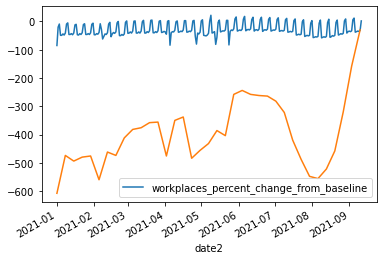

In [169]:
# Execute the cell with the following command to visualize the results
df_province_largest.plot('date2', 'workplaces_percent_change_from_baseline')

df_province_largest.resample('7D', on='date2').sum()['workplaces_percent_change_from_baseline'].plot()

#### 7. Compare the results above with the results in the google mobility report pdf of your selected province. Discuss the differences and similarities. Please save the mobility report pdf that you use to compare the results with! An example mobility report pdf can be found [here](https://www.gstatic.com/covid19/mobility/2021-09-01_AW_Mobility_Report_en.pdf)